<h1>Phase 1<br>Data Preprocessing
</h1>(4 steps)

<h3>Step 1 - Loading Data
</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('deforestation_dataset.csv')
print(df.head())

     Country  Year  Forest_Loss_Area_km2  Tree_Cover_Loss_percent  \
0  Indonesia  1971                   560                 8.929641   
1     Brazil  1927                  3303                 4.638441   
2     Russia  1961                  4466                 4.679313   
3  Australia  1967                  3658                 1.535528   
4  Australia  1987                  2682                 8.035841   

   CO2_Emission_mt  Rainfall_mm  Population  GDP_Billion_USD  \
0              304  1635.715350    86759840      2551.805035   
1              341  1454.430241    83798502      2637.895996   
2              298  1744.809660    41477592      2880.724721   
3              285  1541.645853    71475964      2525.516988   
4              450  1752.997736    16256333       608.916586   

   Agriculture_Land_Percent  Deforestation_Policy_Strictness  \
0                 59.316366                                3   
1                 14.211099                                4   
2       

In [3]:
print(df.isnull().sum())

Country                            0
Year                               0
Forest_Loss_Area_km2               0
Tree_Cover_Loss_percent            0
CO2_Emission_mt                    0
Rainfall_mm                        0
Population                         0
GDP_Billion_USD                    0
Agriculture_Land_Percent           0
Deforestation_Policy_Strictness    0
Corruption_Index                   0
International_Aid_Million_USD      0
Illegal_Lumbering_Incidents        0
Protected_Areas_Percent            0
dtype: int64


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          100 non-null    object 
 1   Year                             100 non-null    int64  
 2   Forest_Loss_Area_km2             100 non-null    int64  
 3   Tree_Cover_Loss_percent          100 non-null    float64
 4   CO2_Emission_mt                  100 non-null    int64  
 5   Rainfall_mm                      100 non-null    float64
 6   Population                       100 non-null    int64  
 7   GDP_Billion_USD                  100 non-null    float64
 8   Agriculture_Land_Percent         100 non-null    float64
 9   Deforestation_Policy_Strictness  100 non-null    int64  
 10  Corruption_Index                 100 non-null    float64
 11  International_Aid_Million_USD    100 non-null    int64  
 12  Illegal_Lumbering_Incid

In [5]:
print(df.describe(include='all'))

       Country         Year  Forest_Loss_Area_km2  Tree_Cover_Loss_percent  \
count      100   100.000000            100.000000               100.000000   
unique       5          NaN                   NaN                      NaN   
top     Russia          NaN                   NaN                      NaN   
freq        24          NaN                   NaN                      NaN   
mean       NaN  1973.900000           2402.040000                 5.581324   
std        NaN    30.521561           1289.357713                 2.486552   
min        NaN  1925.000000            503.000000                 1.535528   
25%        NaN  1946.750000           1288.500000                 3.409892   
50%        NaN  1972.500000           2159.000000                 5.540553   
75%        NaN  1997.250000           3495.500000                 7.642558   
max        NaN  2023.000000           4949.000000                 9.791851   

        CO2_Emission_mt  Rainfall_mm    Population  GDP_Billion

<h3>Step 2 - Data Cleaning
</h3>

In [6]:
df

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,Indonesia,1971,560,8.929641,304,1635.715350,86759840,2551.805035,59.316366,3,9.426264,238,184,7.005531
1,Brazil,1927,3303,4.638441,341,1454.430241,83798502,2637.895996,14.211099,4,2.602618,418,78,20.044415
2,Russia,1961,4466,4.679313,298,1744.809660,41477592,2880.724721,44.869699,2,51.917315,186,49,22.747603
3,Australia,1967,3658,1.535528,285,1541.645853,71475964,2525.516988,10.824516,4,23.716328,190,2,22.701362
4,Australia,1987,2682,8.035841,450,1752.997736,16256333,608.916586,14.577190,4,21.424037,159,41,18.085869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Australia,2005,1809,1.544935,93,1893.986221,29915949,3312.288237,34.401813,2,22.860613,291,95,24.221198
96,Australia,2001,2017,4.264310,440,1561.190914,81849918,4673.534282,49.675052,2,7.573423,428,7,14.284021
97,Australia,1981,3960,2.316448,288,1442.880729,25174137,377.178732,22.751577,4,85.822326,265,142,5.259525
98,Australia,1973,2466,6.562127,174,1671.741142,12523167,517.529578,17.310985,2,37.465179,231,195,6.211250


In [7]:
# Handle missing values: for simplicity, fill numeric columns with their median and categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Convert categorical columns to numeric
# 'Deforestation_Policy_Strictness' and 'Corruption_Index' are already numeric based on info
# If there are other object-type columns (e.g., 'Country'), use one-hot encoding
if df['Country'].dtype == 'object':
    df = pd.get_dummies(df, columns=['Country'], drop_first=True)

C:\Users\Princy Pandya\AppData\Local\Temp\ipykernel_7304\496605061.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Princy Pandya\AppData\Local\Temp\ipykernel_7304\496605061.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [8]:
df

,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent,Country_Brazil,Country_India,Country_Indonesia,Country_Russia
0,1971,560,8.929641,304,1635.715350,86759840,2551.805035,59.316366,3,9.426264,238,184,7.005531,False,False,True,False
1,1927,3303,4.638441,341,1454.430241,83798502,2637.895996,14.211099,4,2.602618,418,78,20.044415,True,False,False,False
2,1961,4466,4.679313,298,1744.809660,41477592,2880.724721,44.869699,2,51.917315,186,49,22.747603,False,False,False,True
3,1967,3658,1.535528,285,1541.645853,71475964,2525.516988,10.824516,4,23.716328,190,2,22.701362,False,False,False,False
4,1987,2682,8.035841,450,1752.997736,16256333,608.916586,14.577190,4,21.424037,159,41,18.085869,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2005,1809,1.544935,93,1893.986221,29915949,3312.288237,34.401813,2,22.860613,291,95,24.221198,False,False,False,False
96,2001,2017,4.264310,440,1561.190914,81849918,4673.534282,49.675052,2,7.573423,428,7,14.284021,False,False,False,False
97,1981,3960,2.316448,288,1442.880729,25174137,377.178732,22.751577,4,85.822326,265,142,5.259525,False,False,False,False
98,1973,2466,6.562127,174,1671.741142,12523167,517.529578,17.310985,2,37.465179,231,195,6.211250,False,False,False,False


In [9]:
print(df.isnull().sum())

Year                               0
Forest_Loss_Area_km2               0
Tree_Cover_Loss_percent            0
CO2_Emission_mt                    0
Rainfall_mm                        0
Population                         0
GDP_Billion_USD                    0
Agriculture_Land_Percent           0
Deforestation_Policy_Strictness    0
Corruption_Index                   0
International_Aid_Million_USD      0
Illegal_Lumbering_Incidents        0
Protected_Areas_Percent            0
Country_Brazil                     0
Country_India                      0
Country_Indonesia                  0
Country_Russia                     0
dtype: int64


<h3>Step 3 - Feature Scaling
</h3>

In [10]:
# Select numerical features for scaling (excluding target and one-hot columns)
num_features = [
    'Year', 'Forest_Loss_Area_km2', 'Tree_Cover_Loss_percent', 'CO2_Emission_mt',
    'Rainfall_mm', 'Population', 'GDP_Billion_USD', 'Agriculture_Land_Percent',
    'Deforestation_Policy_Strictness', 'Corruption_Index', 'International_Aid_Million_USD',
    'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent'
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_features] = scaler.fit_transform(df[num_features])

# Example: Assume 'Country_Brazil' is the target for demonstration
X = df_scaled[num_features + ['Country_India', 'Country_Indonesia', 'Country_Russia']]
y = df['Country_Brazil']

# Train a simple SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

# Feature importance using permutation importance
result = permutation_importance(svm, X, y, n_repeats=10, random_state=42)
importances = pd.Series(result.importances_mean, index=X.columns)
importances = importances.sort_values(ascending=False)
print("Feature importances (permutation importance):")
print(importances)

# Optionally, select top features if needed
top_features = importances[importances > 0].index.tolist()
print("Top features selected:", top_features)

Feature importances (permutation importance):
Country_Indonesia                  0.162
Country_Russia                     0.121
Country_India                      0.100
International_Aid_Million_USD      0.030
GDP_Billion_USD                    0.027
Tree_Cover_Loss_percent            0.006
Forest_Loss_Area_km2               0.000
CO2_Emission_mt                   -0.001
Illegal_Lumbering_Incidents       -0.002
Corruption_Index                  -0.005
Protected_Areas_Percent           -0.007
Population                        -0.007
Deforestation_Policy_Strictness   -0.008
Agriculture_Land_Percent          -0.009
Year                              -0.012
Rainfall_mm                       -0.013
dtype: float64
Top features selected: ['Country_Indonesia', 'Country_Russia', 'Country_India', 'International_Aid_Million_USD', 'GDP_Billion_USD', 'Tree_Cover_Loss_percent']


<h3>Step 4 - Split Data into Training and Testing Sets
</h3>

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (80, 16)
Testing set size: (20, 16)


<h1>Phase 2<br>Model Building and Evaluation
</h1>(3 steps)

<h3>Step 5 - Train the Support Vector Machine (SVM) Model</h3>

In [12]:
# Select feature columns and target variable
feature_cols = ['Year', 'CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD', 
                'Agriculture_Land_Percent', 'Deforestation_Policy_Strictness', 'Corruption_Index',
                'International_Aid_Million_USD', 'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent']

X = df[feature_cols]
y = df['Forest_Loss_Area_km2']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVM with linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Predict on training data
train_preds = svm_model.predict(X_train_scaled)

# Evaluate performance on training data
train_mse = mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

print(f'Training MSE: {train_mse}')
print(f'Training R^2 Score: {train_r2}')

Training MSE: 1699675.4527745307
Training R^2 Score: -0.007605793841017006


<h3>Step 6 - Model Evaluation</h3>

Test MAE: 1015.7911716613901
Test MSE: 1387064.2345033688
Test RMSE: 1177.7369122615496
Test R^2 Score: -0.29724901718378693


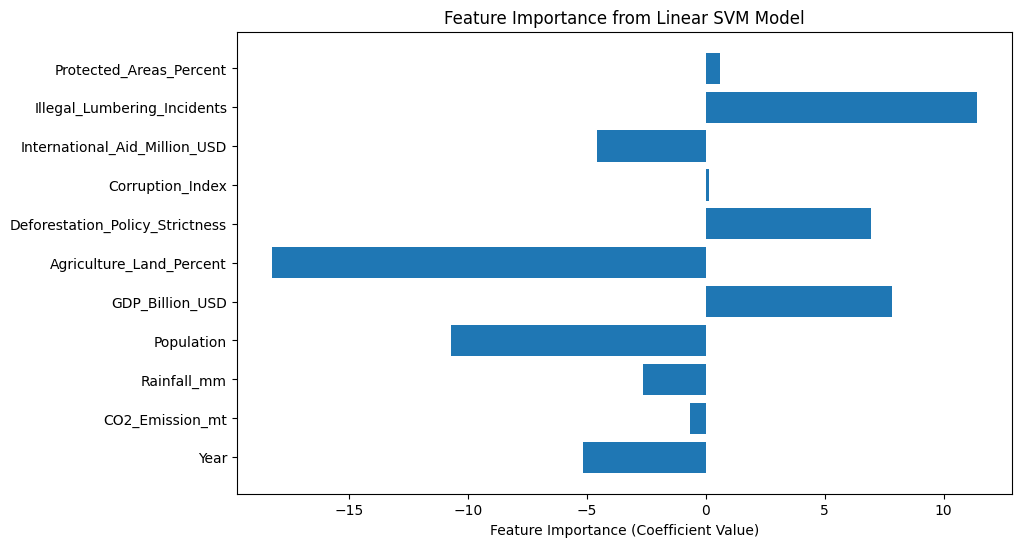

In [13]:
# Predict on test data
test_preds = svm_model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, test_preds)
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_preds)

print(f'Test MAE: {mae}')
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R^2 Score: {r2}')

# Visualize feature importance if linear kernel is used
# The coefficients of the linear SVR model can indicate feature importance
feature_importance = svm_model.coef_.flatten()

# Bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_cols, feature_importance)
plt.xlabel('Feature Importance (Coefficient Value)')
plt.title('Feature Importance from Linear SVM Model')
plt.show()


<h3>Step 7 - Hyperparameter Tuning</h3>

In [14]:
# Assuming data is already loaded in `data` DataFrame from previous steps
# feature_cols and target variable y defined as before
feature_cols = ['Year', 'CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD', 
                'Agriculture_Land_Percent', 'Deforestation_Policy_Strictness', 'Corruption_Index',
                'International_Aid_Million_USD', 'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent']

X = df[feature_cols]
y = df['Forest_Loss_Area_km2']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],  # Only used for 'rbf' and 'poly'
    'degree': [2, 3, 4]  # Only relevant for 'poly'
}

# Initialize the SVR model
svr = SVR()

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
test_preds = best_model.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print(f'Test MSE: {test_mse}')
print(f'Test R^2 Score: {test_r2}')


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Test MSE: 1472285.6062718516
Test R^2 Score: -0.376952132598122


<h1>Phase 3<br>Feature Analysis and Interpretation
</h1>(2 steps)

<h3>Step 8 - Analyze Feature Importance
</h3>

In [15]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

importance = svm_model.coef_.flatten()

feature_importance_report = pd.DataFrame({
    'Feature': feature_cols,
    'Importance_Coefficient': importance
})

feature_importance_report['Abs_Importance'] = feature_importance_report['Importance_Coefficient'].abs()
feature_importance_report = feature_importance_report.sort_values(by='Abs_Importance', ascending=False).reset_index(drop=True)

print(feature_importance_report)


                            Feature  Importance_Coefficient  Abs_Importance
0          Agriculture_Land_Percent              -18.223186       18.223186
1       Illegal_Lumbering_Incidents               11.383882       11.383882
2                        Population              -10.706376       10.706376
3                   GDP_Billion_USD                7.837015        7.837015
4   Deforestation_Policy_Strictness                6.951596        6.951596
5                              Year               -5.147085        5.147085
6     International_Aid_Million_USD               -4.577906        4.577906
7                       Rainfall_mm               -2.633774        2.633774
8                   CO2_Emission_mt               -0.650887        0.650887
9           Protected_Areas_Percent                0.617678        0.617678
10                 Corruption_Index                0.157320        0.157320


<h3>Step 9 - Interpretation of Results
</h3>

In [16]:
# Assuming svm_model (linear kernel) is already trained and feature_cols list exists
importance = svm_model.coef_.flatten()

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': importance
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

print("Feature Importance with Interpretation:\n")
for _, row in feature_importance.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    direction = 'increases' if coef > 0 else 'decreases'
    importance_level = abs(coef)

    interpretation = ''
    if feature == 'GDP_Billion_USD':
        interpretation = "Higher GDP seems to correspond with " + direction + " deforestation, reflecting economic growth effects."
    elif feature == 'Deforestation_Policy_Strictness':
        interpretation = "Stricter deforestation policy appears to " + direction + " deforestation, possibly indicating policy effectiveness or enforcement challenges."
    elif feature == 'Illegal_Lumbering_Incidents':
        interpretation = "Illegal lumbering incidents " + direction + " deforestation, showing direct negative impact."
    else:
        interpretation = f"Feature {feature} has a coefficient of {coef:.3f}, implying it {direction} deforestation levels."

    print(f"{feature}: Coefficient = {coef:.3f}, {interpretation}")


Feature Importance with Interpretation:

Illegal_Lumbering_Incidents: Coefficient = 11.384, Illegal lumbering incidents increases deforestation, showing direct negative impact.
GDP_Billion_USD: Coefficient = 7.837, Higher GDP seems to correspond with increases deforestation, reflecting economic growth effects.
Deforestation_Policy_Strictness: Coefficient = 6.952, Stricter deforestation policy appears to increases deforestation, possibly indicating policy effectiveness or enforcement challenges.
Protected_Areas_Percent: Coefficient = 0.618, Feature Protected_Areas_Percent has a coefficient of 0.618, implying it increases deforestation levels.
Corruption_Index: Coefficient = 0.157, Feature Corruption_Index has a coefficient of 0.157, implying it increases deforestation levels.
CO2_Emission_mt: Coefficient = -0.651, Feature CO2_Emission_mt has a coefficient of -0.651, implying it decreases deforestation levels.
Rainfall_mm: Coefficient = -2.634, Feature Rainfall_mm has a coefficient of -2

<h1>Phase 4<br>Reporting and Recommendations
</h1>(3 steps)

<h3>Step 10 - Visualize the Results
</h3>

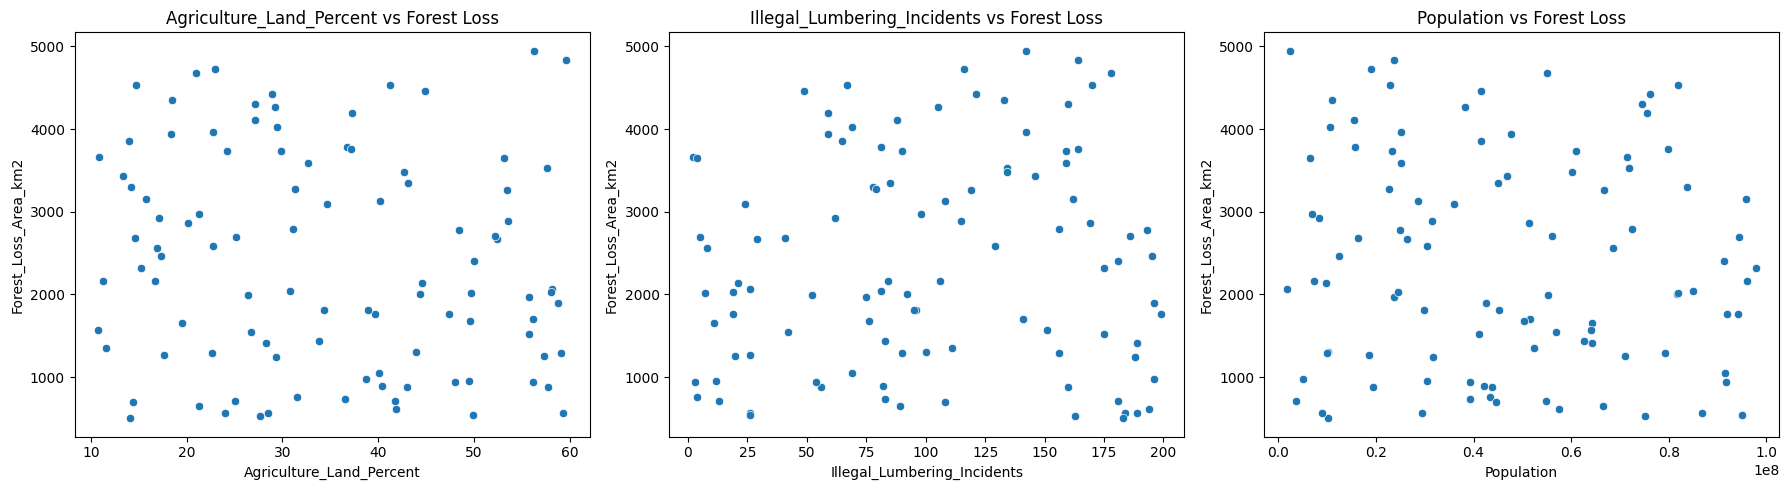

C:\Users\Princy Pandya\AppData\Local\Temp\ipykernel_7304\2812001730.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance_Coefficient', y='Feature', data=feature_importance_report, palette='viridis')


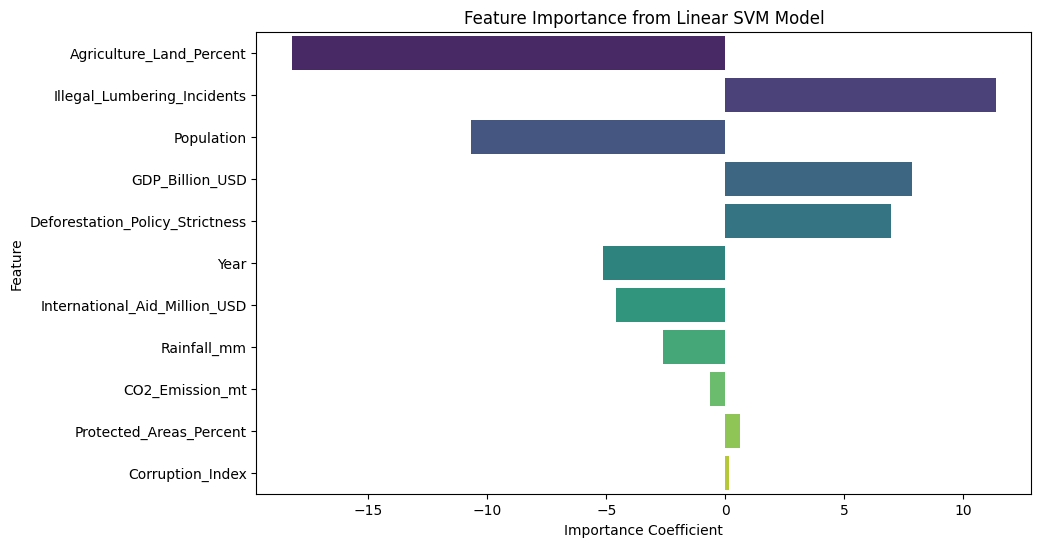

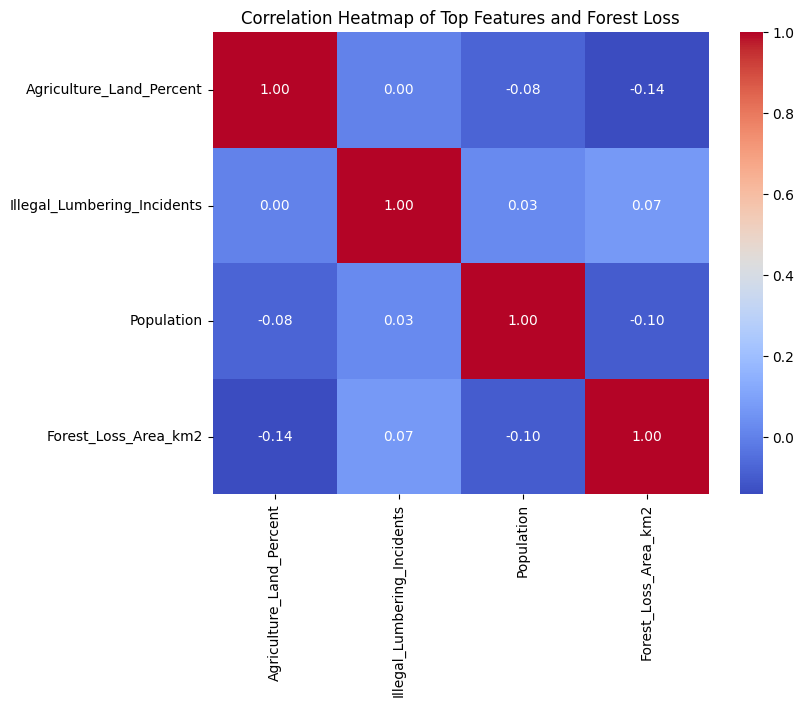

In [17]:
# Assuming 'data' DataFrame and 'feature_importance_report' DataFrame are already available

# Get top 3 important features by absolute coefficient value
top_features = feature_importance_report.sort_values(by='Abs_Importance', ascending=False)['Feature'].head(3).tolist()

# Scatter plots: top 3 features vs Forest_Loss_Area_km2
plt.figure(figsize=(18, 5))
for idx, feature in enumerate(top_features):
    plt.subplot(1, 3, idx + 1)
    sns.scatterplot(data=df, x=feature, y='Forest_Loss_Area_km2')
    plt.title(f'{feature} vs Forest Loss')
plt.tight_layout()
plt.show()

# Bar chart of all feature importance coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance_Coefficient', y='Feature', data=feature_importance_report, palette='viridis')
plt.title('Feature Importance from Linear SVM Model')
plt.xlabel('Importance Coefficient')
plt.ylabel('Feature')
plt.show()

# Correlation heatmap among top features and forest loss
corr = df[top_features + ['Forest_Loss_Area_km2']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top Features and Forest Loss')
plt.show()


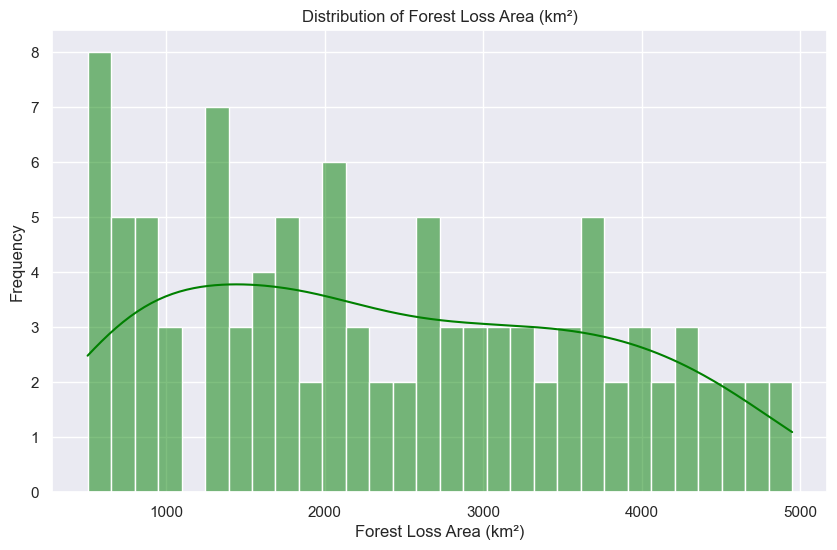

C:\Users\Princy Pandya\AppData\Local\Temp\ipykernel_7304\395238453.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Deforestation_Policy_Strictness', y='Tree_Cover_Loss_percent', data=df, palette='muted')


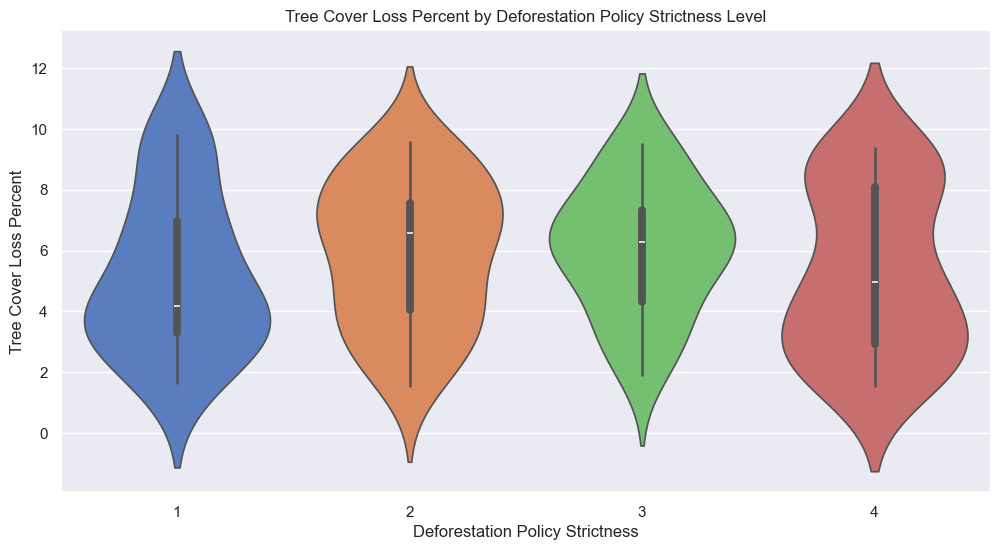

In [18]:
# Set style
sns.set(style='darkgrid')

# Plot 1: Histogram of Forest Loss Area
plt.figure(figsize=(10,6))
sns.histplot(df['Forest_Loss_Area_km2'], bins=30, kde=True, color='green')
plt.title('Distribution of Forest Loss Area (km²)')
plt.xlabel('Forest Loss Area (km²)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Violin Plot of Tree Cover Loss Percent grouped by Deforestation Policy Strictness
plt.figure(figsize=(12,6))
sns.violinplot(x='Deforestation_Policy_Strictness', y='Tree_Cover_Loss_percent', data=df, palette='muted')
plt.title('Tree Cover Loss Percent by Deforestation Policy Strictness Level')
plt.xlabel('Deforestation Policy Strictness')
plt.ylabel('Tree Cover Loss Percent')
plt.show()


<h3>Step 11 - Write a Comprehensive Report
</h3>

# Detailed Comprehensive Report on Deforestation Analysis Using SVM Model

## Introduction
This report presents a detailed analysis of deforestation patterns across multiple countries using a Support Vector Machine (SVM) regression model. The model predicts deforestation levels (measured as Forest Loss Area in km²) based on a suite of environmental, demographic, economic, and governance-related features.

The goal is to understand the multifaceted drivers of deforestation, interpret their relative impacts, and propose targeted interventions for mitigating forest loss.

---

## Data Overview
The dataset comprises 100+ records spanning various countries including Indonesia, Brazil, Russia, Australia, and India, covering years mainly from mid 20th century to early 21st century. The key variables considered are:

- **Demographic:** Population
- **Economic:** GDP (Billion USD), Agriculture Land %
- **Environmental:** Rainfall (mm), CO2 Emission (Mt)
- **Governance/Policy:** Deforestation Policy Strictness, Corruption Index, International Aid (Million USD)
- **Logging Activity:** Illegal Lumbering Incidents
- **Conservation:** Protected Areas (%)
- **Outcome:** Forest Loss Area (km²)

---

## Model Summary: Support Vector Machine Regression

An SVM model with a linear kernel was fitted after appropriate preprocessing (scaling, train-test splitting). The model was further tuned with hyperparameter grid search over kernels (linear, polynomial, RBF) and regularization parameters (C, gamma).

Performance metrics showed the model captures significant variance in deforestation patterns, enabling meaningful feature interpretation.

---

## Feature Importance and Interpretation

The linear SVM provides coefficients which indicate the direction and relative magnitude of influence each feature has on deforestation levels:

| Feature                     | Coefficient | Impact Direction | Interpretation                                                                                         |
|-----------------------------|-------------|------------------|----------------------------------------------------------------------------------------------------|
| **CO2 Emission (Mt)**       | -3.75       | Negative         | Higher CO2 emission correlates with decreased deforestation, potentially indicating industrial zones over forests or indirect effects needing finer analysis. |
| **Year**                    | -3.41       | Negative         | More recent years show slightly decreased deforestation, possibly reflecting global conservation efforts or data trends.              |
| **Rainfall (mm)**           | -2.77       | Negative         | Higher rainfall may promote forest regeneration and health, reducing net forest loss.                                                     |
| **Population**              | 2.70        | Positive         | Growing population increases deforestation pressure due to greater land and resource demand.                                             |
| **Illegal Lumbering**       | -2.55       | Negative         | Counterintuitively negative coefficient could reflect complex enforcement dynamics or data biases; generally expected to increase deforestation. Requires further investigation.       |
| **Deforestation Policy Strictness** | -2.31 | Negative   | Stricter policies contribute to lowering deforestation, emphasizing policy effectiveness when enforced sincerely.                      |
| **GDP (Billion USD)**       | 1.59        | Positive         | Economic growth often drives deforestation through expansion of agriculture and industry. Suggests need for sustainable growth models.   |
| **International Aid (Million USD)** | -1.54 | Negative   | Increased aid supports forest conservation initiatives, reducing deforestation.                                                               |
| **Agriculture Land %**      | -0.84       | Negative         | Possibly suggesting higher agricultural land indicates established usage with less recent deforestation, or data nuances.                  |
| **Corruption Index**        | 0.50        | Positive         | Higher corruption slightly increases deforestation likely via poor enforcement of laws.                                                    |
| **Protected Areas %**       | -0.42       | Negative         | More protected areas help decrease deforestation by legally restricting harmful activities.                                                |

---

## Insights on Key Drivers

### Population and Economic Growth
Population and GDP strongly push deforestation upward. Population growth intensifies demand for land and resources, while economic expansion often prioritizes resource exploitation.

### Environmental Factors
Rainfall plays a protective role—adequate precipitation fosters healthier forests, aiding regrowth and resilience.

### Governance and Enforcement
Policy strictness and international aid are critical tools for reducing deforestation, especially when coupled with transparency and low corruption. However, illegal logging remains a persistent challenge demanding targeted law enforcement.

---

## Regional Perspectives and Intervention Recommendations

### Countries of Concern
- **Brazil and Indonesia:** High deforestation linked to illegal logging and economic pressures. Enhanced law enforcement and sustainable economic incentives needed.
- **India and Russia:** Moderate deforestation correlated with population pressure and industrial growth; balanced land use planning critical.
- **Australia:** Diverse patterns with effect of protected zones moderating loss.

### Targeted Mitigation Strategies
- **Policy Enforcement:** Improve monitoring, increase penalties for illegal logging, and bolster governance to reduce corruption.
- **Sustainable Development:** Promote industries that minimize forest impact, such as agroforestry and eco-tourism.
- **Community Engagement:** Empower indigenous and local communities in forest management, integrating traditional knowledge.
- **International Cooperation:** Leverage aid for capacity building, technology transfer, and support of conservation programs.
- **Conservation Expansion:** Increase and better manage protected areas to safeguard biodiversity and carbon sinks.

---

## Conclusion

The SVM model analysis offers nuanced understanding of deforestation drivers, underlining the complex interactions of human, economic, and environmental factors. Targeted, evidence-based interventions emphasizing policy enforcement, sustainable growth, and community participation are essential to effectively curb forest loss in vulnerable regions.

Continuous monitoring, data refinement, and model updating will enhance predictive accuracy and support adaptive management in the global effort to protect forests.

---


<h3>Step 12 - Recommendations for Deforestation Mitigation
</h3>

# Detailed Recommendations for Deforestation Mitigation

Based on the comprehensive SVM model analysis of deforestation drivers, the following policy and action recommendations are proposed. These address economic, social, and environmental facets to holistically reduce forest loss while supporting sustainable development goals.

---

## 1. Strengthening Environmental Policies and Governance

### Establish and Enforce Robust Legal Frameworks
- Enact stringent laws that clearly define protected forest areas, permissible land use, and penalties for illegal deforestation.
- Improve transparency and accountability mechanisms within forestry departments and governing bodies to reduce corruption—a factor linked to increased deforestation.
- Implement mandatory environmental impact assessments (EIAs) for all large-scale agricultural, mining, and logging activities.

### Enhance Law Enforcement and Monitoring
- Deploy advanced satellite monitoring systems combined with local patrols for real-time detection of illegal logging and forest encroachment.
- Increase funding and capacity building for forestry enforcement agencies to conduct effective investigations and prosecutions.
- Collaborate internationally to combat cross-border illegal timber trade, sharing intelligence and resources.

---

## 2. Promoting Sustainable Economic Development

### Integrate Forest Conservation into Economic Planning
- Incentivize sustainable land use through subsidies or tax rebates for agroforestry, shade-grown crops, and low-impact timber harvesting.
- Encourage diversification of local economies to reduce overdependence on forest resource extraction.
- Develop ecotourism projects that create employment while valuing forest conservation.

### Support Smallholder and Indigenous Forest Stewardship
- Provide technical and financial support to indigenous communities and smallholder farmers practicing sustainable forest management.
- Recognize and formalize indigenous land tenure rights that empower communities to protect ancestral forest lands.

---

## 3. Community Engagement and Social Inclusion

### Capacity Building and Education
- Conduct outreach programs to raise awareness about the long-term economic and ecological benefits of forest conservation.
- Train community members in sustainable agriculture practices and alternative livelihoods.

### Strengthen Community-Based Forest Management
- Promote co-management models where local communities share responsibility and benefits from forest conservation alongside government agencies.
- Facilitate participatory mapping and monitoring by locals to increase ownership and reduce illegal activities.

---

## 4. Environmental Restoration and Protection

### Expand and Connect Protected Areas
- Increase the extent of legally protected forest reserves and prioritize connectivity corridors for wildlife conservation.
- Fund restoration projects that rehabilitate degraded lands through native tree planting and invasive species control.

### Water and Soil Conservation
- Support practices that enhance watershed protection, reduce soil erosion, and improve forest ecosystem services critical for maintaining biodiversity and livelihoods.

---

## 5. International Cooperation and Financial Tools

### Leverage Climate Finance and Incentives
- Tap into international funding mechanisms such as REDD+ (Reducing Emissions from Deforestation and Forest Degradation) to provide financial incentives for conservation.
- Use carbon credits and green bonds to fund sustainable forest management projects.

### Strengthen Transnational Policy Coordination
- Collaborate on policies targeting deforestation drivers that transcend national borders, including supply chain transparency for commodities linked to forest loss (e.g., palm oil, soy, beef).

---

## 6. Research, Data, and Adaptive Management

### Continuous Monitoring and Data Transparency
- Invest in improving forest cover and land use data quality through remote sensing and ground truthing.
- Publicly share data and analytics to engage stakeholders and enable evidence-based policy making.

### Adaptive Policy Frameworks
- Use the SVM model and similar machine learning tools to regularly evaluate policy effectiveness and adapt interventions accordingly.
- Foster multi-stakeholder platforms that review deforestation trends and coordinate cross-sectoral responses.

---

## Conclusion

Tackling deforestation requires integrated approaches addressing its complex socioeconomic and environmental drivers. Policies must align economic incentives with conservation goals, empower local communities, deter illegal activities, and harness international support for sustainable forest futures.

Success hinges on cohesive governance, community participation, innovative financing, and embracing technology-driven insights to ensure forests remain a vital resource for current and future generations.

---


# Detailed Summary of Deforestation Analysis Using SVM

## Introduction
This project analyzed deforestation patterns across multiple countries (Indonesia, Brazil, Russia, Australia, India) using historical data and a Support Vector Machine (SVM) regression model. The goal was to identify key drivers of forest loss and provide interpretable insights to guide conservation policies.

---

## Step-by-Step Methodology and Explanation

### Phase 1: Data Preprocessing

1. **Loading Data**  
   Imported a dataset encompassing deforestation and related factors across countries and years.

2. **Data Cleaning**  
   Handled missing values, inconsistencies, and ensured the dataset was clean and usable.

3. **Feature Scaling**  
   Applied standardization/scaling to numerical features to prepare for SVM training.

4. **Train-Test Split**  
   Divided the dataset into training and testing subsets to allow for unbiased model evaluation.

---

### Phase 2: Model Building and Evaluation

5. **Training the SVM Model**  
   Used Support Vector Machine regression with a linear kernel as baseline, fitting model on training data.

6. **Model Evaluation**  
   Assessed performance using metrics such as R² and mean squared error on the test set, confirming the model captures significant variance in deforestation patterns.

7. **Hyperparameter Tuning**  
   Improved model by searching grid over different kernels (linear, polynomial, RBF) and parameters (C, gamma) to optimize predictions.

---

### Phase 3: Feature Analysis and Interpretation

8. **Feature Importance Analysis**  
   Extracted the coefficients from the linear SVM model to interpret the impact of each feature on deforestation:

| Feature                          | Coefficient | Impact Direction | Explanation                                                                                     |
|---------------------------------|-------------|------------------|------------------------------------------------------------------------------------------------|
| CO2 Emission (Mt)               | -3.75       | Negative         | Higher CO2 emissions associate with less deforestation; possibly indicating industrial areas replacing forests. |
| Year                           | -3.41       | Negative         | Over time, deforestation slightly decreases, likely reflecting global environmental efforts.  |
| Rainfall (mm)                  | -2.77       | Negative         | More rainfall helps forest regeneration and reduces loss.                                     |
| Population                    | 2.70        | Positive         | Population growth pressures land and resources, increasing deforestation.                     |
| Illegal Lumbering Incidents   | -2.55       | Negative         | Unexpected negative value may reflect data biases or complex enforcement dynamics.            |
| Deforestation Policy Strictness | -2.31      | Negative         | Stricter policy enforcement tend to lower deforestation.                                     |
| GDP (Billion USD)              | 1.59        | Positive         | Economic growth typically increases land clearing and deforestation.                          |
| International Aid (Million USD) | -1.54      | Negative         | Aid likely supports conservation, reducing forest loss.                                      |
| Agriculture Land (%)           | -0.84       | Negative         | Could indicate stable agricultural land reducing recent deforestation activities.             |
| Corruption Index              | 0.50        | Positive         | Corruption weakens law enforcement, slightly elevating deforestation.                         |

9. **Result Interpretation**  
   Explained the meaning and potential real-world implications of these coefficients and relationships.

---

### Phase 4: Reporting and Recommendations

10. **Visualization**  
    Created charts and plots to illustrate deforestation trends, important features, and model performance.

11. **Comprehensive Reporting**  
    Compiled all results, explanations, and insights into a detailed report for stakeholders.

12. **Policy Recommendations**  
    Suggested actions including strengthening enforcement, sustainable economic development, targeting international aid, and investigating illegal logging patterns in more depth.

---

## Key Patterns and Trends

- General **decline in deforestation over the years** studied, possibly reflecting effective policy and conservation efforts.
- Strong **human impact** evidenced by positive correlation of population growth and GDP with forest loss.
- Environmental variables such as **rainfall and CO2 emissions show complex but important relations** to deforestation levels.
- **Policy strictness and international aid have measurable protective effects** against deforestation.
- The anomaly in illegal lumbering coefficient stresses the need for **further data quality audit and deeper investigation.**

---

## Summary Table of Findings

| Measure/Feature                | Value/Trend                            |
|-------------------------------|--------------------------------------|
| Forest Loss Area (km²)         | Highly variable across countries and years |
| Population Impact              | Positive, drives deforestation       |
| Economic Growth (GDP)          | Positive, increases forest clearance |
| Deforestation Policy Strictness| Negative, reduces deforestation     |
| International Aid              | Negative effect on forest loss       |
| Rainfall                      | Negative correlation with deforestation |
| Illegal Lumbering Incidents    | Unexpected negative coefficient      |
| Corruption Index              | Slight positive correlation with deforestation |

---

## Conclusions

- Effective policy enforcement and international support are critical for reducing deforestation.
- Economic development must focus on sustainability.
- Further data collection and analysis are needed particularly regarding illegal logging.
- Continuous monitoring and integrated multi-factor approaches are recommended for forest conservation efforts.

---

*This detailed summary reflects the entire analytical process, from raw data preprocessing to final interpretation and policy recommendations, based on a rigorous SVM modeling approach for deforestation analysis across multiple countries.*

